In [1]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
# создаем диапазон дат
x = pd.date_range('2000-01-01', '2003-12-31', freq='H')

# создаем линию тренда
y0 = [1000 + .025 * val for val in range(len(x))]

# добавляем годовые синусоидальные колебания
y1 = [50 * np.sin(idx * (360 / (365.25 * 24)) * (np.pi / 180)) 
      for idx in range(len(y0))]

# добавляем недельные колебания
y2 = [(25 * np.sin(((idx / 7) - 17) * (360 / 24) * (np.pi / 180))) +
      (10 * np.sin(((idx / 7) - 5) * (360 / 12) * (np.pi / 180))) +
      (25 * np.sin(((idx / 7) - 12) * (360 / 12) * (np.pi / 180))) +
      (15 * np.sin(((idx / 7) - 20) * (360 / 12) * (np.pi / 180)))
      for idx in range(len(x))]

# добавляем дневные синосоидальные колебания
y3 = [20 * np.sin((idx - 6) * (360 / 24) * (np.pi / 180)) 
      for idx in range(len(y2))]

# создаем аддитивные кривые
z0 = y0
z1 = [y0[idx] + y1[idx] for idx in range(len(x))]
z2 = [y0[idx] + y1[idx] + y2[idx] for idx in range(len(x))]
z3 = [y0[idx] + y1[idx] + y2[idx] + y3[idx] for idx in range(len(x))]

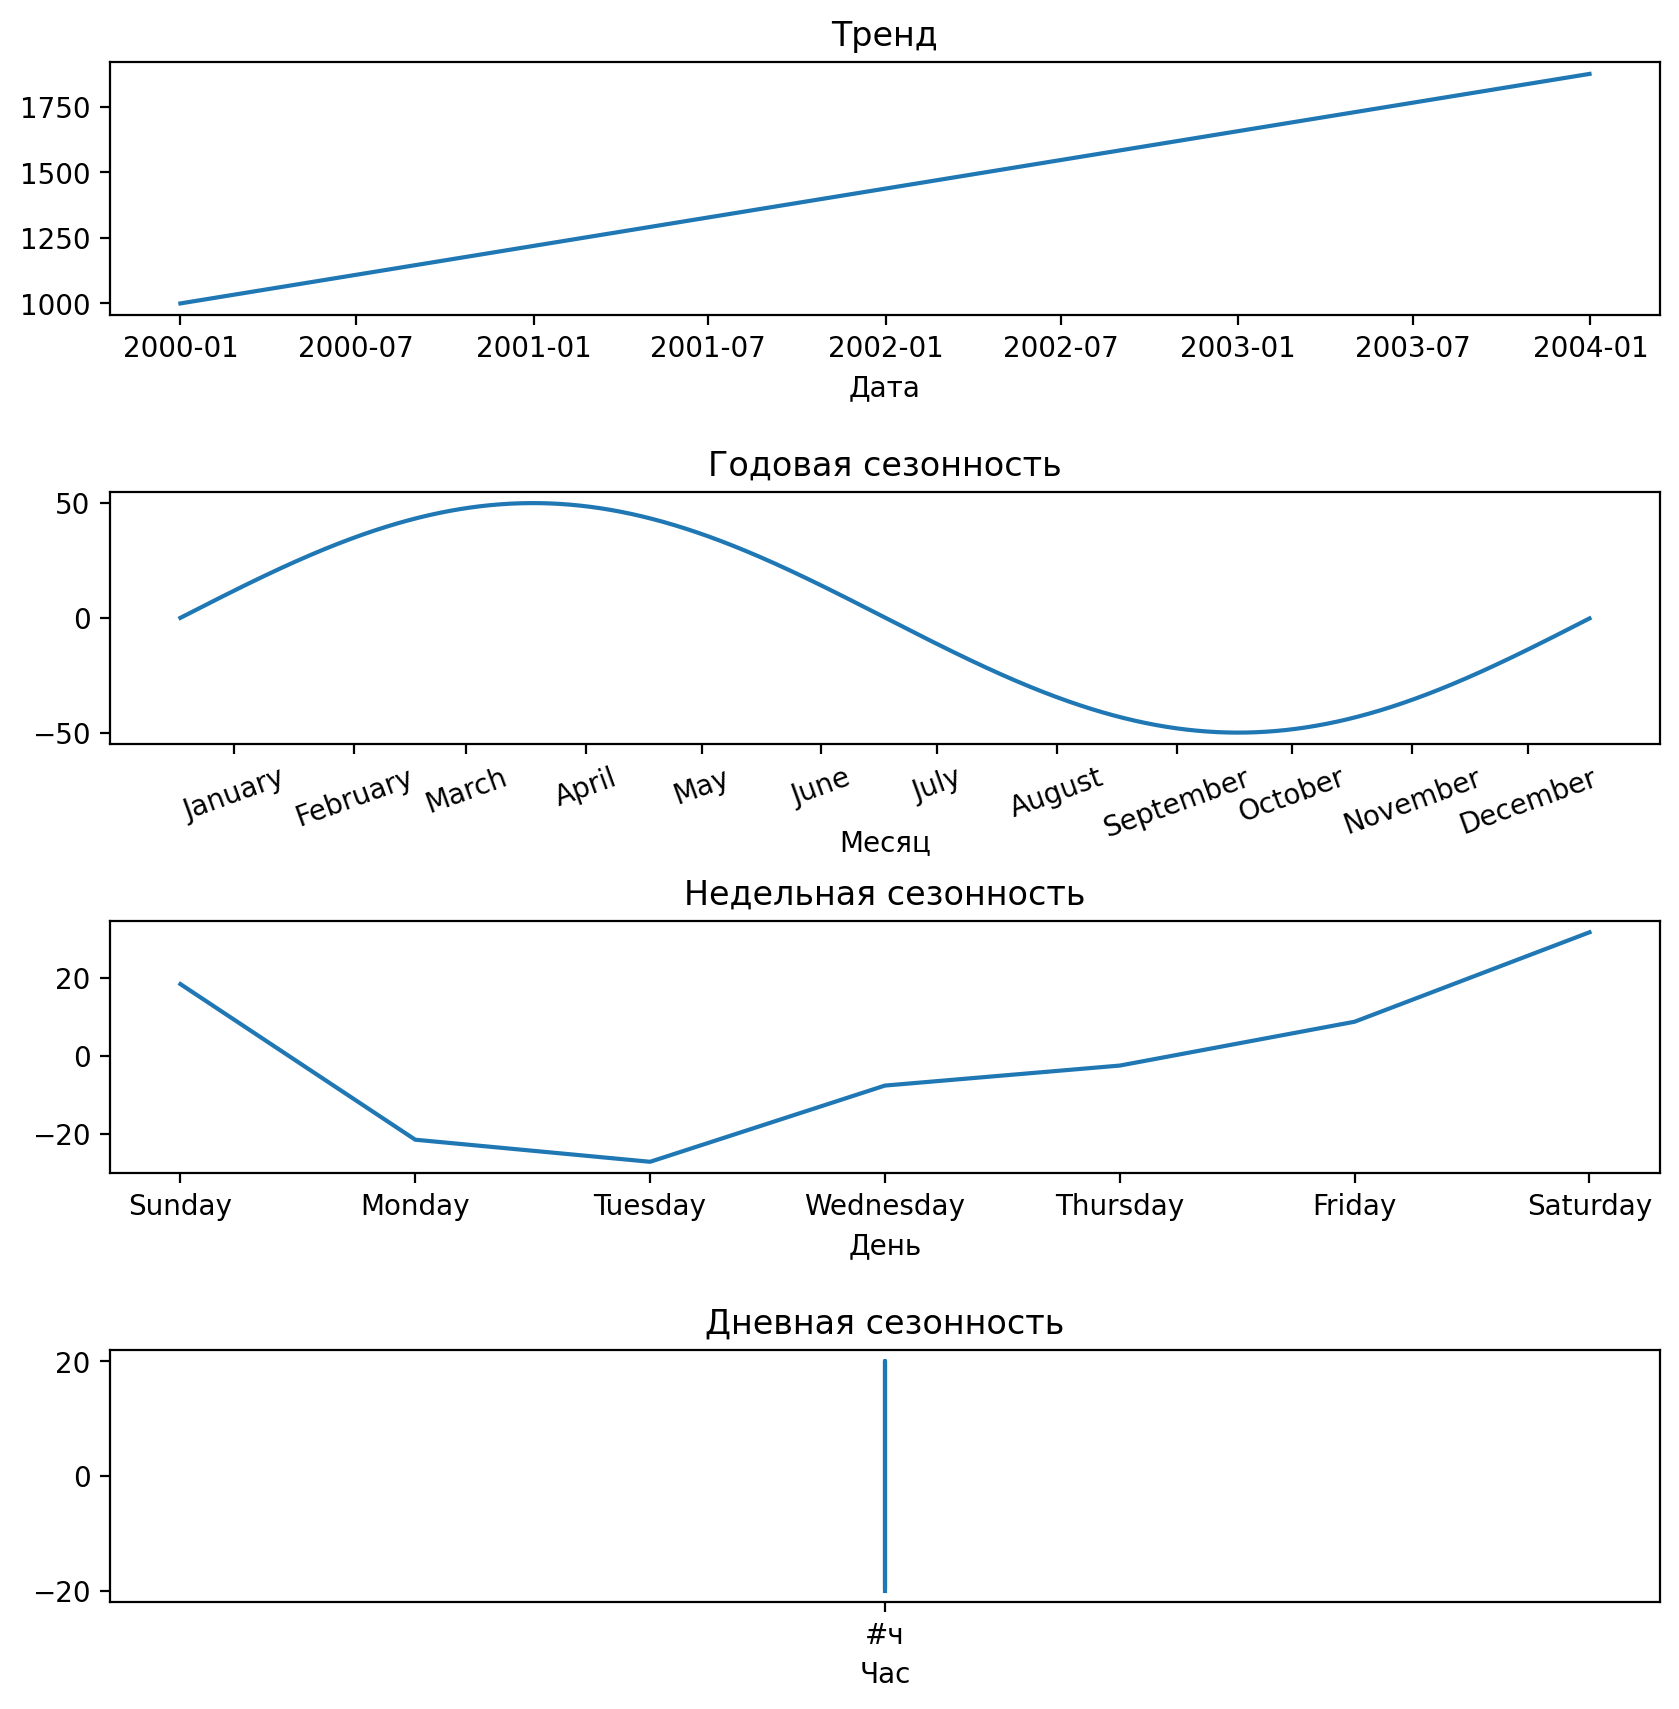

In [3]:
# визуализируем компоненты по отдельности
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=.7)

ax[0].set_title('Тренд')
ax[0].plot(x, y0)
ax[0].set_xlabel('Дата')

ax[1].set_title('Годовая сезонность')
ax[1].plot(x[:24 * 365], y1[:24 * 365])
ax[1].set_xticks([ts for ts in x[:24 * 365] 
                  if ts.hour == 0 and ts.day == 15])
ax[1].set_xticklabels([ts.month_name() 
                       for ts in x[:24 * 365] 
                       if ts.hour == 0 and ts.day == 15], 
                      rotation=20)
ax[1].set_xlabel('Месяц', labelpad=-5)

ax[2].set_title('Недельная сезонность')
ax[2].plot([ts.day_name() for ts in x[24: 24 * 8] 
            if ts.hour == 12], 
           [y2[idx] for idx in range(len(x[24: 24 * 8])) 
            if x[idx].hour == 23])
ax[2].set_xlabel('День')

ax[3].set_title('Дневная сезонность')
ax[3].plot(x[:24].strftime('%#ч'), y3[:24])
ax[3].set_xlabel('Час')

plt.show()

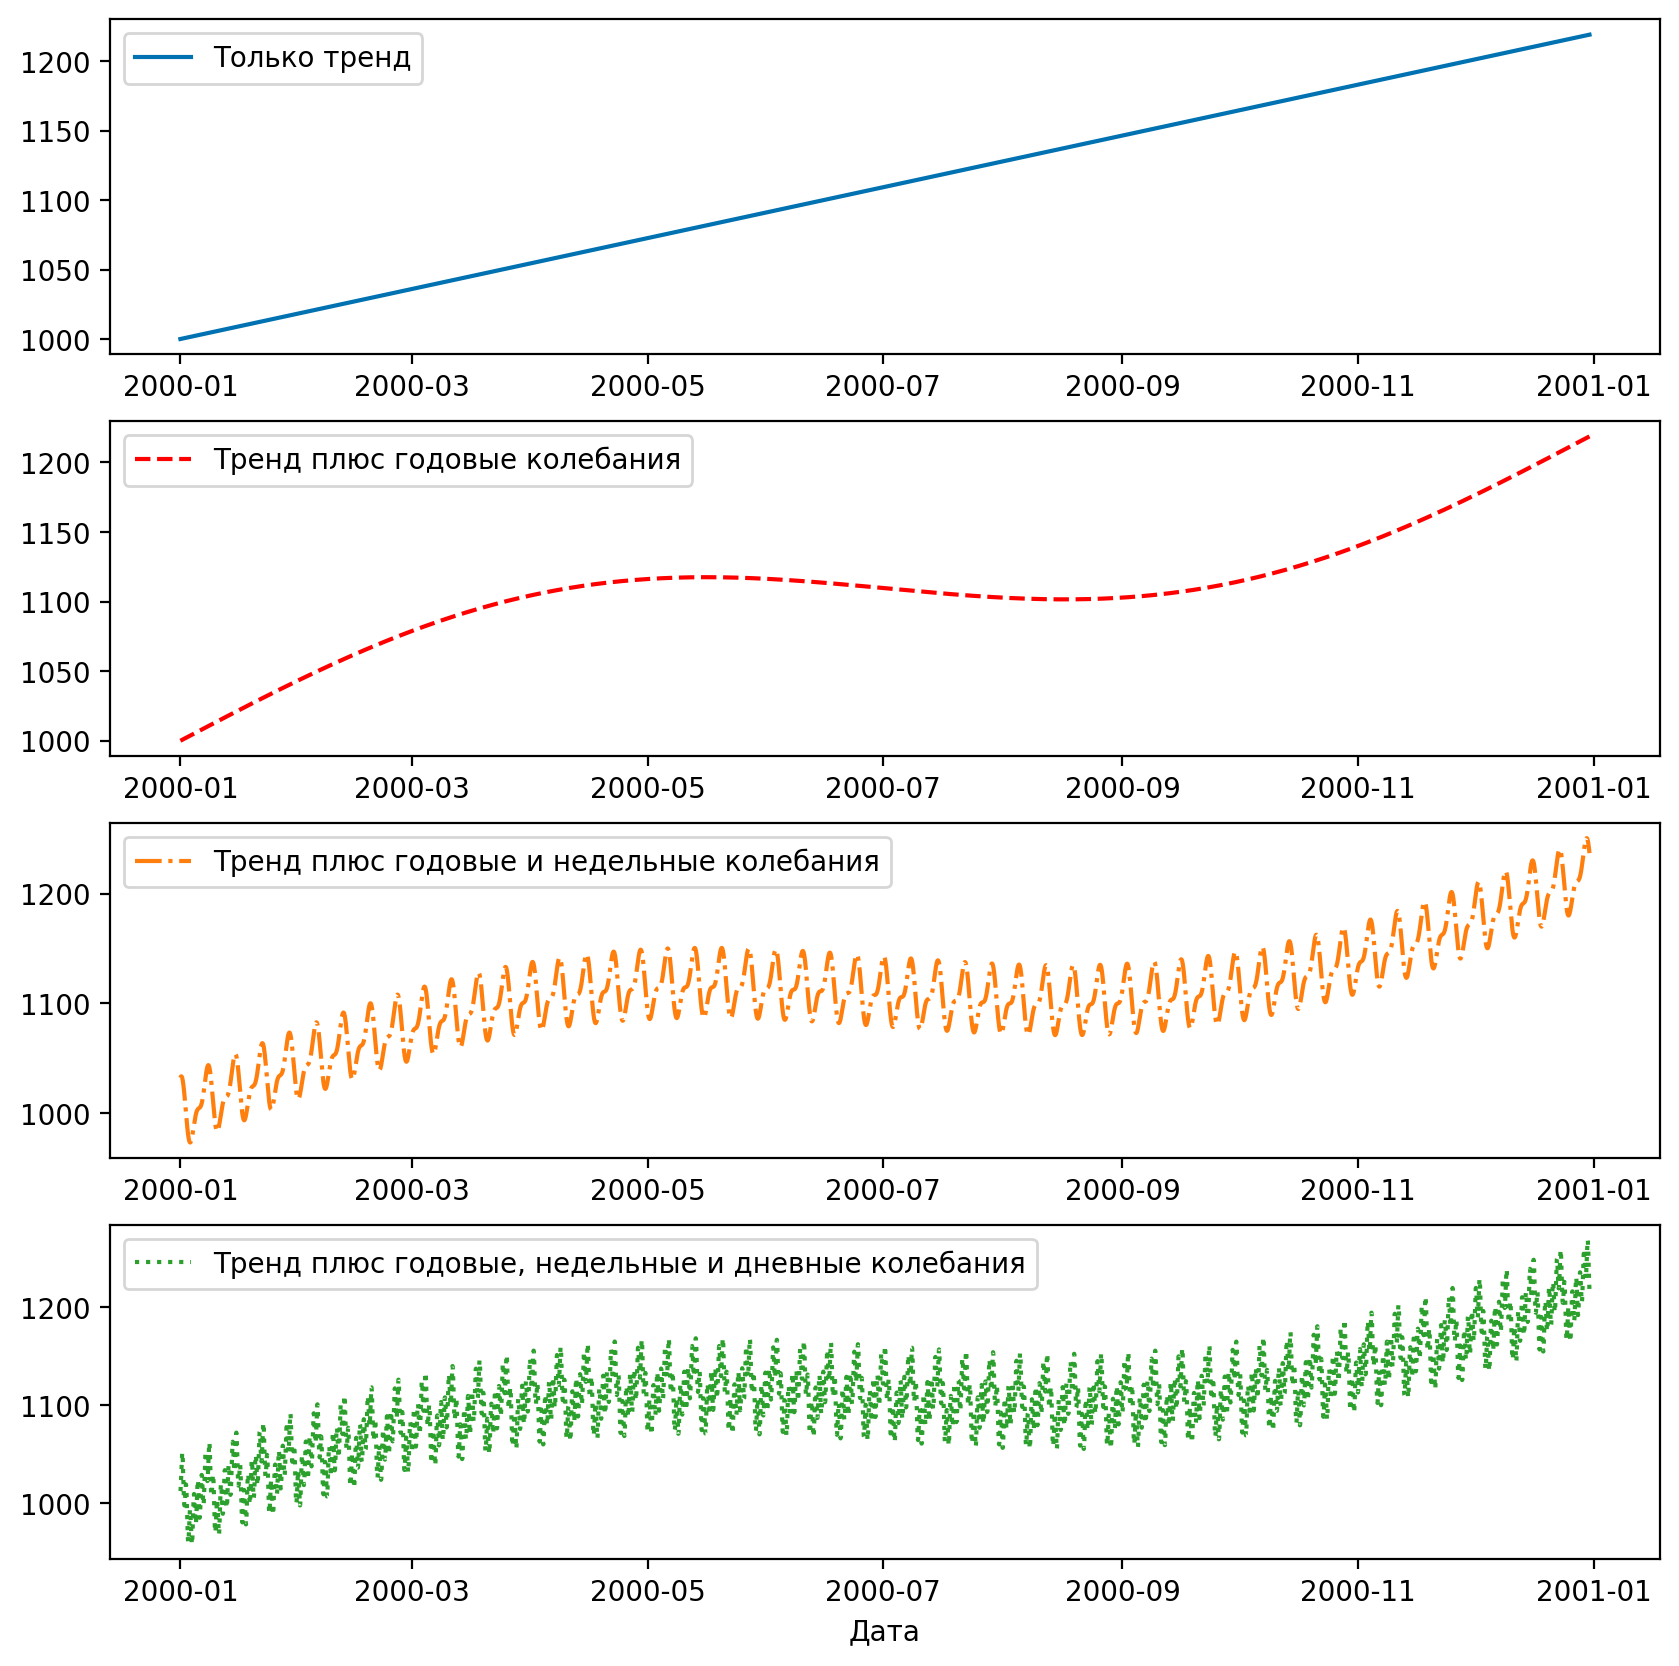

In [4]:
# визуализируем процесс складывания компонент
fig, ax = plt.subplots(4, 1, figsize=(10, 10))

ax[0].plot(x[:8760], 
           z0[:8760], 
           label='Только тренд', 
           c='#0072B2', 
           ls='-')
ax[0].legend()

ax[1].plot(x[:8760], 
           z1[:8760], 
           label='Тренд плюс годовые колебания', 
           c='r', 
           ls='--')
ax[1].legend()

ax[2].plot(x[:8760], 
           z2[:8760], 
           label='Тренд плюс годовые и недельные колебания', 
           c='tab:orange',
           ls='-.')
ax[2].legend()

ax[3].plot(x[:8760], 
           z3[:8760], 
           label='Тренд плюс годовые, недельные и дневные колебания', 
           c='tab:green', 
           ls=':')
ax[3].legend()
ax[3].set_xlabel('Дата')

plt.show()